# DL_Assignment_2

## Roll Number: CS23MTECH14003

## Name: Hrishikesh Hemke

1. Convolution function: It accepts an image input, a filter kernel, stride, padding, and the non-linear function. The function must convolve the input image (after padding if specified) with the
kernel (at the specified stride size) and generate an output activation after applying the specified
non-linearity. Verify with the standard options for the non-linear activation functions - sigmoid,
tanh, ReLU, Leaky ReLU. Display the input image (e.g. a small image of the IITH logo), the filter
kernel, and the output activation map. Ensure that your function can accept multi-channel input
and a corresponding kernel volume. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from torch.nn import Linear as Linear_Layer
import warnings
import random
import torch.nn as nn
import torch
warnings.filterwarnings('ignore')

Input Image dimension: 256 256
Activation function used ReLU
Output Image dimension: 254 254


Input Image dimension: 256 256
Activation function used sigmoid
Output Image dimension: 254 254


Input Image dimension: 256 256
Activation function used tanh
Output Image dimension: 254 254


Input Image dimension: 256 256
Activation function used Leaky ReLU
Output Image dimension: 254 254




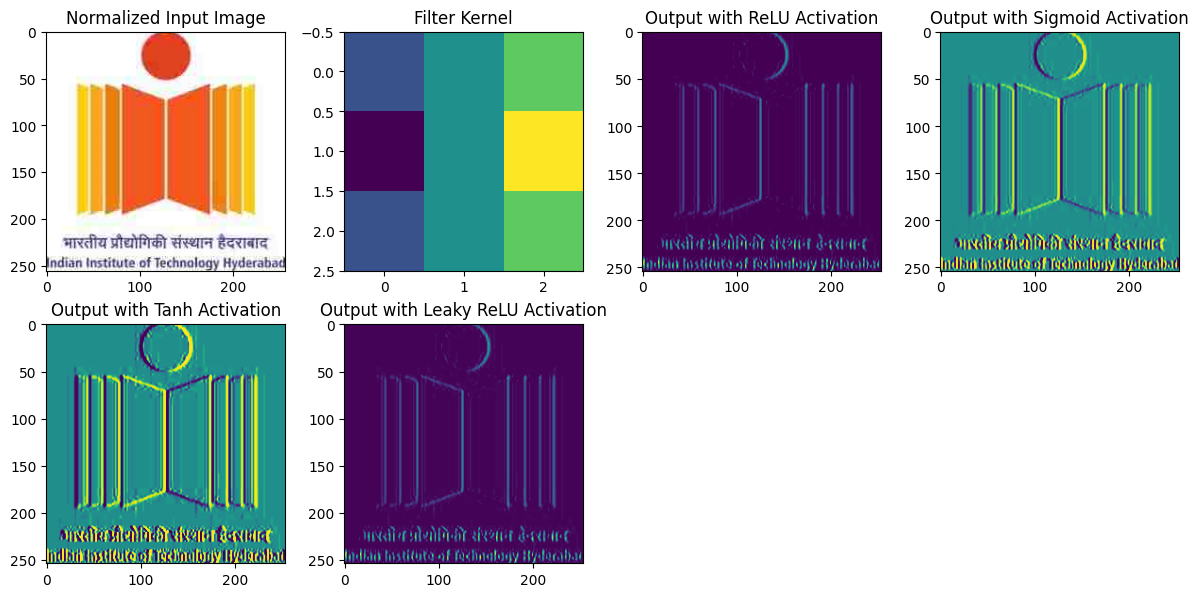

In [2]:
def normalize_image(image):
    # Normalize image to be in the range [0, 1]
    return image.astype(np.float32) / 255.0

def convolution(image, kernel, stride, padding, activation_function):

    kernel_height, kernel_width, kernel_channels = kernel.shape
    image_height, image_width, image_channels = image.shape 
    print("Input Image dimension:",image_height,image_width)
    print("Activation function used",activation_function)

    # Calculate output dimensions
    output_height = (image_height - kernel_height + 2 * padding) // stride + 1
    output_width = (image_width - kernel_width + 2 * padding) // stride + 1
    print("Output Image dimension:",output_height,output_width)
    print("\n")

    # Apply padding if specified
    if padding > 0:
        pad_width=((padding, padding), (padding, padding), (0, 0))
        image = np.pad(image, pad_width=pad_width, mode='constant', constant_values=0)
  
    # Initialize output
    output = np.zeros((output_height, output_width))
    
    # Perform convolution
    for i in range(0, output_height):
        for j in range(0, output_width):
            # Sum across channels for each spatial position
            output[i, j] = np.sum(image[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width, :] * kernel)

    # Apply activation function
    if activation_function == 'sigmoid':
        output = 1 / (1 + np.exp(-output))
    elif activation_function == 'tanh':
        output = np.tanh(output)
    elif activation_function == 'ReLU':
        output = np.maximum(0, output)
    elif activation_function == 'Leaky ReLU':
        output = np.maximum(0.01 * output, output)
    return output

# Read the input image
input_image = mpimg.imread('IIT_H_Logo.jpg')  

# Normalize the input image
normalized_input = normalize_image(input_image)

random_seed = 42
np.random.seed(random_seed)
# Assuming you have a filter kernel 'filter_kernel' of size 3x3x3
filter_kernel = np.random.rand(3, 3, normalized_input.shape[2])

sobel_filter_kernel_horizontal = np.array([[-1, 0, 1],
                                           [-2, 0, 2],
                                           [-1, 0, 1]])

# Assuming you want a 3-channel Sobel filter (for each color channel) with different Convolve activation
sobel_filter_kernel = np.stack([sobel_filter_kernel_horizontal] * normalized_input.shape[2], axis=-1)

output_relu = convolution(normalized_input, sobel_filter_kernel, stride=1, padding=0, activation_function='ReLU')

output_sigmoid = convolution(normalized_input, sobel_filter_kernel, stride=1, padding=0, activation_function='sigmoid')

output_tanh = convolution(normalized_input, sobel_filter_kernel, stride=1, padding=0, activation_function='tanh')

output_leaky_relu = convolution(normalized_input, sobel_filter_kernel, stride=1, padding=0, activation_function='Leaky ReLU')

# Display input image, filter kernel, and output activation maps
plt.figure(figsize=(12, 6))

plt.subplot(241)
plt.imshow(normalized_input)
plt.title('Normalized Input Image')

# Displaying only the first channel of the filter kernel
plt.subplot(242)
plt.imshow(sobel_filter_kernel[:, :, 0])  
plt.title('Filter Kernel')

#Displaying only the first channel of the output
plt.subplot(243)
plt.imshow(output_relu)  
plt.title('Output with ReLU Activation')

plt.subplot(244)
plt.imshow(output_sigmoid)  
plt.title('Output with Sigmoid Activation')

plt.subplot(245)
plt.imshow(output_tanh)  
plt.title('Output with Tanh Activation')

plt.subplot(246)
plt.imshow(output_leaky_relu) 
plt.title('Output with Leaky ReLU Activation')

plt.tight_layout()
plt.show()

2. Pooling function: It accepts as input the activation map output from the convolution function,
a pooling function, and stride. The function must output the appropriately pooled activation map.
Display the input activation map and the pooled output

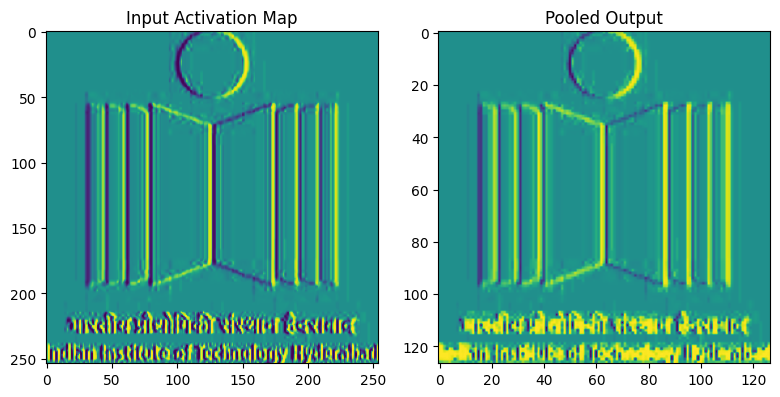

In [3]:
def pooling(activation_map, pooling_function, pool_size, stride):
    # Get dimensions of activation map
    map_height, map_width = activation_map.shape
    
    # Calculate output dimensions
    output_height = (map_height - pool_size) // stride + 1
    output_width = (map_width - pool_size) // stride + 1

    # Initialize pooled output
    pooled_output = np.zeros((output_height, output_width))

    # Apply pooling
    for i in range(0, output_height * stride, stride):
        for j in range(0, output_width * stride, stride):
            # Extracting the region of the activation map
            region = activation_map[i:i + pool_size, j:j + pool_size]
            # Perform pooling
            if pooling_function == 'max':
                pooled_output[i // stride, j // stride] = np.max(region)
            elif pooling_function == 'average':
                pooled_output[i // stride, j // stride] = np.mean(region)
    return pooled_output

pooling_function = 'max'  # or 'average'
pool_size = 2
stride = 2

# Apply pooling with activation_map as sigmoid
pooled_output = pooling(output_sigmoid, pooling_function, pool_size, stride)

# Display input activation map and the pooled output
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.imshow(output_sigmoid)
plt.title('Input Activation Map')

plt.subplot(122)
plt.imshow(pooled_output)
plt.title('Pooled Output')

plt.tight_layout()
plt.show()

3.Convolution layer function: It accepts as input a volume (image or activation maps), number
of filters, kernel dimensions, stride, padding, and the non-linear activation function. The function
must convolve the input volume (after padding if specified) with each kernel (at the specified stride
size) and generate an output activation volume after applying the specified non-linearity. Display
the input image or activation maps, the filter kernels, and the output activation maps. Verify that
the output of this function does indeed have the expected size (W × H × C) as discussed in class.


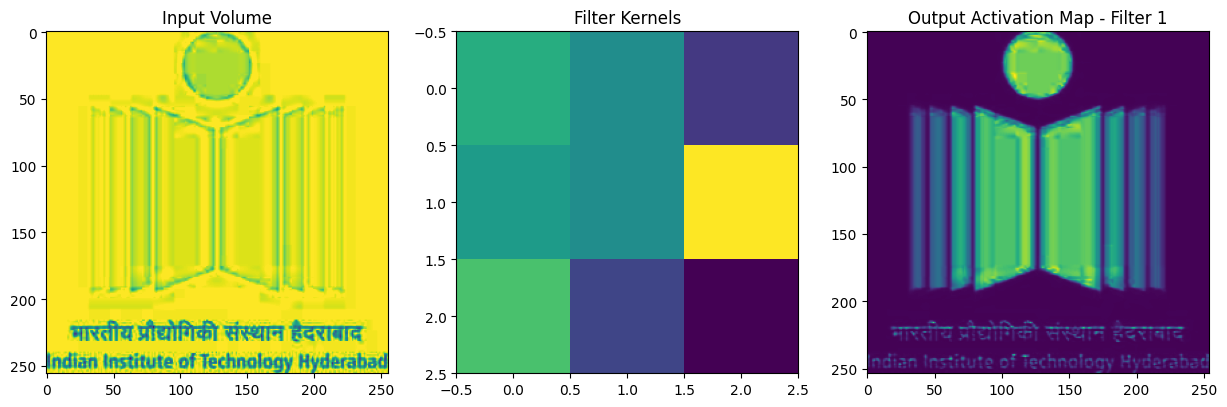

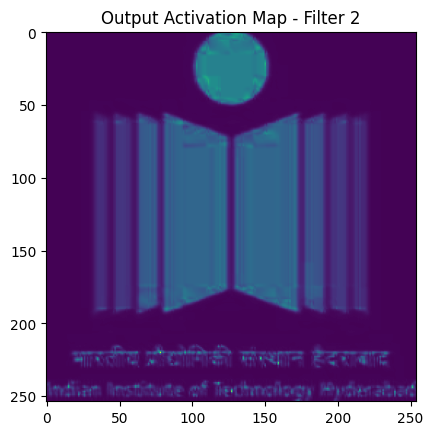

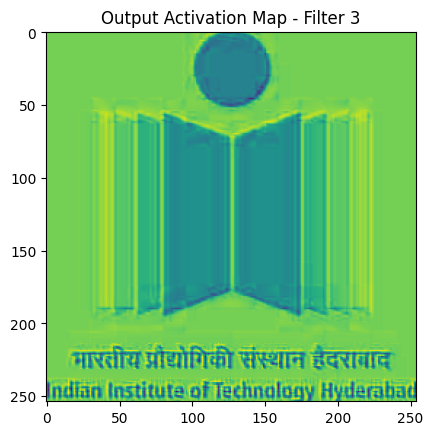


No of Filters: 16

Image dimension (256, 256, 3)

Shape of the output_activation (W × H × C)= (254, 254, 16)


In [4]:
def convolution_layer(image, num_filters, kernel_size, stride, padding, activation_function):
    image_height, image_width, image_channels = image.shape

    # Calculate output dimensions
    output_height = (image_height - kernel_size + 2 * padding) // stride + 1
    output_width = (image_width - kernel_size + 2 * padding) // stride + 1

    # Apply padding if specified
    if padding > 0:
        pad_width=((padding, padding), (padding, padding), (0, 0))
        image = np.pad(image, pad_width=pad_width, mode='constant', constant_values=0)

    # Initialize output for each filter
    output = np.zeros((output_height, output_width, num_filters))

    random_seed = 42
    np.random.seed(random_seed)
    # Generate random filter kernels with the same number of channels as the input image
    filters = [np.random.randn(kernel_size, kernel_size, image_channels) for _ in range(num_filters)]

    # Perform convolution for each filter
    for k in range(num_filters):
        for i in range(0, output_height):
            for j in range(0, output_width):
                # Adjust the indexing to consider padding
                output[i, j, k] = np.sum(image[i*stride:i*stride+kernel_size, j*stride:j*stride+kernel_size, :] * filters[k])

    # Apply activation function
    if activation_function == 'sigmoid':
        output = 1 / (1 + np.exp(-output))
    elif activation_function == 'tanh':
        output = np.tanh(output)
    elif activation_function == 'ReLU':
        output = np.maximum(0, output)
    elif activation_function == 'Leaky ReLU':
        output = np.maximum(0.01 * output, output)

    # Display input image, filter kernels, and output activation maps
    display_convolution(image, filters, output) #filters
    return output, filters

def display_convolution(input_volume, filters, output_volume):
    # Display input volume, filter kernels, and output activation maps
    num_filters = len(filters)

    # Plot input volume
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(input_volume[:,:,0])
    plt.title('Input Volume')

    # Plot filter kernels
    plt.subplot(132)
    for k in range(num_filters):
        # Displaying only the first channel of each filter
        plt.imshow(filters[k][:, :, 0]) 
    plt.title('Filter Kernels')

    # Plot output activation maps for each filter
    plt.subplot(133)
    for k in range(3):
        plt.imshow(output_volume[:, :, k])
        plt.title(f'Output Activation Map - Filter {k + 1}')
        plt.show()


# Set the number of filters
num_filters = 16  
kernel_size = 3
stride = 1
padding = 0 
activation_function = 'sigmoid'

# Apply convolution layer
output_activation, filters = convolution_layer(normalized_input, num_filters, kernel_size, stride, padding, activation_function)

# Display the filters in array form
# print("\nDisplay top 3 filters:")
# for k in range(min(3, len(filters))):  # Display top 3 filters
#     print("\n",filters[k][:, :, 0])

# Display the shaape of output_activation in array form
print("\nNo of Filters:",len(filters))
print("\nImage dimension",normalized_input.shape)
print("\nShape of the output_activation (W × H × C)=",output_activation.shape)

4.Pooling layer function: It accepts as input the activation map volume, the pooling function,
stride, and generates a pooled output volume. A special case for performing Global Average Pooling
should also be provided.

Global pooled output:
 [0.15859572 0.02046946 0.70984787 0.37776633 0.21410393 0.79726521
 0.98398165 0.82974861 0.36985358 0.10947895 0.5979573  0.98954544
 0.01303737 0.99245328 0.45216546 0.87769276]


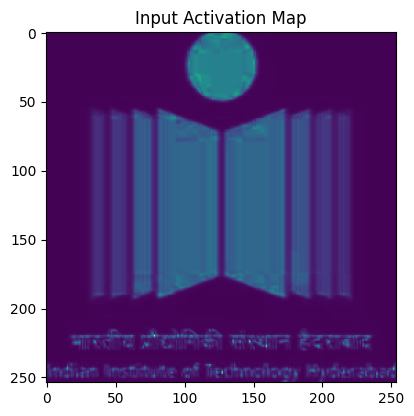

In [5]:
def pooling_layer(activation_map, pooling_function, pool_size, stride):
    # Check if the activation_map is 3D, if not, add a channel dimension
    if len(activation_map.shape) == 2:
        activation_map = np.expand_dims(activation_map, axis=-1)

    # Get dimensions
    map_height, map_width, map_channels = activation_map.shape

    # Check for global average pooling
    if pool_size == 'global':
        # Calculate global average pooling
        pooled_output = np.mean(activation_map, axis=(0, 1), keepdims=True)
        pooled_output=pooled_output.flatten()
    else:
        # Calculate output dimensions
        output_height = (map_height - pool_size) // stride + 1
        output_width = (map_width - pool_size) // stride + 1

        # Initialize pooled output
        pooled_output = np.zeros((output_height, output_width, map_channels))

        # Apply pooling
        for c in range(map_channels):
            for i in range(0, output_height * stride, stride):
                for j in range(0, output_width * stride, stride):
                    # Extract the region of the activation map
                    region = activation_map[i:i + pool_size, j:j + pool_size, c]

                    # Perform pooling
                    if pooling_function == 'max':
                        pooled_output[i // stride, j // stride, c] = np.max(region)
                    elif pooling_function == 'average':
                        pooled_output[i // stride, j // stride, c] = np.mean(region)
    return pooled_output

def display_pooling(input_map, pooled_output):
    # Display input activation map and the pooled output
    plt.figure(figsize=(8, 4))

    plt.subplot(121)
    plt.imshow(input_map[:, :, 1])
    plt.title('Input Activation Map')

    print('Global pooled output:\n',pooled_output)
    plt.tight_layout()
    plt.show()

# Choose pooling function ('max' or 'average'), pool size, and stride
pooling_function = 'max'  # or 'average'
pool_size = 'global'    #'global'  # or an integer for regular pooling
stride = 2

# Apply pooling layer
pooled_output = pooling_layer(output_activation, pooling_function, pool_size, stride)

# Display input activation map and the pooled output
display_pooling(output_activation, pooled_output)

5.Multilayer Perceptron (MLP) function: It accepts as input a vector, the number of hidden
layers, the size of each hidden layer, the non-linear function, and the size of the output layer. This
function should generate an output vector of the specified size. Generate the output with and
without the softmax function applied to the output layer.

In [6]:
def mlp_function(input_vector, hidden_layers, hidden_layer_size, activation_function, output_size, apply_softmax=True):
    random_seed = 42
    np.random.seed(random_seed)

    # Initialize weights and biases for the hidden layers
    weights_hidden = [np.random.randn(input_vector.shape[0], hidden_layer_size)]
    biases_hidden = [np.zeros((1, hidden_layer_size))]

    for _ in range(hidden_layers - 1):
        weights_hidden.append(np.random.randn(hidden_layer_size, hidden_layer_size))
        biases_hidden.append(np.zeros((1, hidden_layer_size)))

    # Initialize weights and biases for the output layer
    weights_output = np.random.randn(hidden_layer_size, output_size)
    bias_output = np.zeros((1, output_size))

    # Forward pass through the hidden layers
    hidden_output = input_vector
    for i in range(hidden_layers):
        hidden_output = np.dot(hidden_output, weights_hidden[i]) + biases_hidden[i]
        hidden_output = apply_activation(hidden_output, activation_function)

    # Forward pass through the output layer
    output = np.dot(hidden_output, weights_output) + bias_output

    # Apply softmax to the output if specified
    return softmax(output) if apply_softmax else output

def apply_activation(x, activation_function):
    if activation_function == 'sigmoid':
        return 1 / (1 + np.exp(-x))
    elif activation_function == 'tanh':
        return np.tanh(x)
    elif activation_function == 'ReLU':
        return np.maximum(0, x)
    elif activation_function == 'Leaky ReLU':
        return np.maximum(0.01 * x, x)
    else:
        raise ValueError(f"Unsupported activation function: {activation_function}")

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Specify the number of hidden layers, size of each hidden layer, activation function, and output size
hidden_layers = 2
hidden_layer_size = 64
activation_function = 'ReLU'
output_size = 10  # Size of the output vector

# Apply MLP function
output_vector_Softmax_True = mlp_function(pooled_output, hidden_layers, hidden_layer_size, activation_function, output_size,apply_softmax=True)
output_vector_Softmax_False = mlp_function(pooled_output, hidden_layers, hidden_layer_size, activation_function, output_size,apply_softmax=False)

# Display the output vector
print("\nWhen output_vector_Softmax_True=",output_vector_Softmax_True)
print("\nWhen output_vector_Softmax_False=",output_vector_Softmax_False)



When output_vector_Softmax_True= [[2.82642761e-072 8.78928489e-097 8.37400765e-122 8.90554082e-061
  6.64857032e-084 9.93654912e-191 2.28832162e-111 7.22480156e-147
  1.04755593e-171 1.00000000e+000]]

When output_vector_Softmax_False= [[  59.02042087    2.59031331  -55.02271478   85.49651696   32.24478801
  -213.72999899  -30.99159271 -112.73495492 -169.92805716  223.76753398]]


6. Putting-it all together: Finally, use the functions you have written to implement a CNN with the
following architecture. The CNN must accept an image input and output a vector of appropriate
dimension. In other words, the function must effectively implement the feed-forward path in a
CNN. (5)

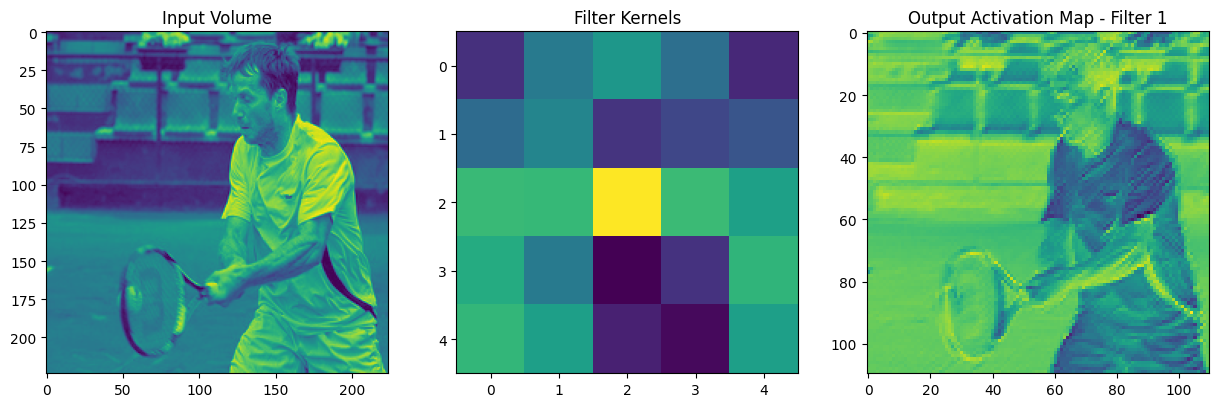

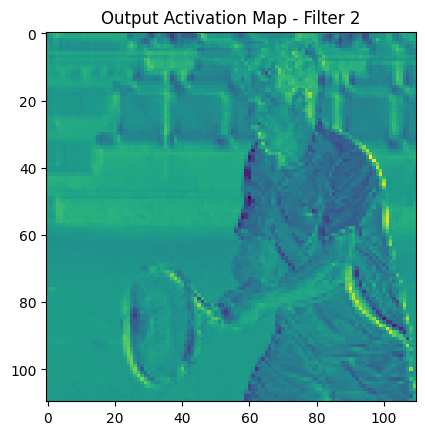

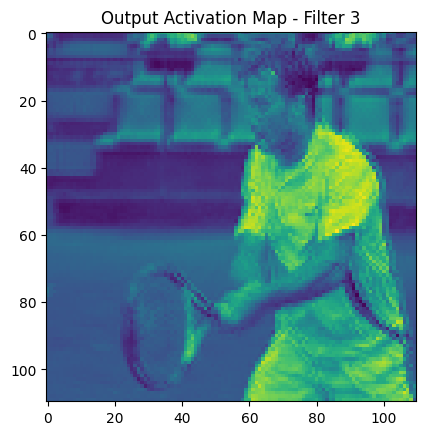


After first convolution layer dimensions are: (110, 110, 16)

After first pooling dimensions are: (55, 55, 16)


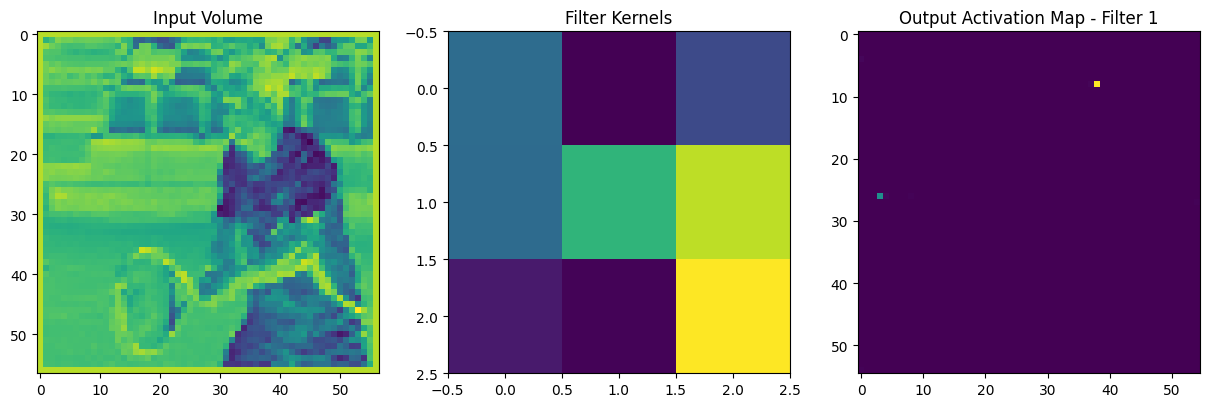

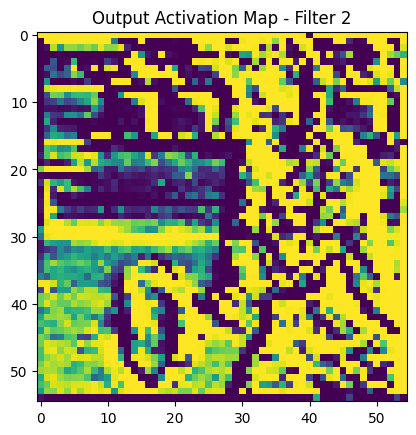

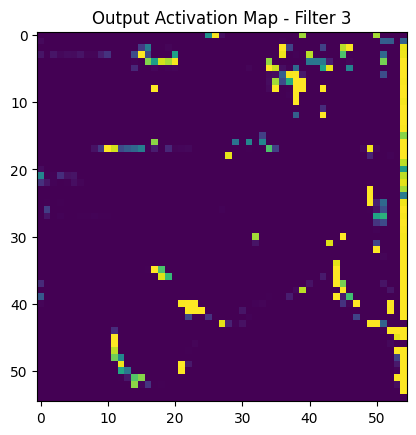


After second convolution layer dimensions are: (55, 55, 32)

After second pooling dimensions are: (27, 27, 32)

output_vector dimension:= (1, 1000)


In [7]:
# Read the input image
input_image = mpimg.imread('ILSVRC2012_val_00022830.jpeg')  

# Normalize the input image
normalized_input = normalize_image(input_image)
# Apply convolution layer
output_activation, filters = convolution_layer(normalized_input, num_filters=16, kernel_size=5, stride=2, padding=0, activation_function= 'RELU')
print("\nAfter first convolution layer dimensions are:",output_activation.shape)

# Apply pooling
pooled_output = pooling_layer(output_activation, pooling_function = 'max', pool_size=2, stride=2)
print("\nAfter first pooling dimensions are:",pooled_output.shape)

# Apply convolution layer
output_activation, filters = convolution_layer(pooled_output, num_filters=32, kernel_size=3, stride=1, padding=1, activation_function= 'sigmoid')
print("\nAfter second convolution layer dimensions are:",output_activation.shape)

# Apply pooling
pooled_output = pooling_layer(output_activation, pooling_function = 'max', pool_size=2, stride=2)
print("\nAfter second pooling dimensions are:",pooled_output.shape)
# Apply pooling layer
pooled_output = pooling_layer(pooled_output, pooling_function= 'max', pool_size='global', stride=2)

# Apply MLP function
output_vector = mlp_function(pooled_output, hidden_layers=1, hidden_layer_size=20, activation_function= 'ReLU', output_size=1000)

# Display dimensions and vector
#print("\nDimension of input image:",input_image.shape)
print("\noutput_vector dimension:=",output_vector.shape)

7.The adding problem: In this task, each data sample consists of a sequence of variable length,
but a constant depth (size of feature vector at each time instance) of 2. All values of the first dimension (randomly) lie in [0, 1], and the second dimension is all zeros except for two elements that
are marked by 1. The objective of the task is to sum the random values whose second dimensions
are marked by 1. Train the different RNNs (Elmon network, LSTM, and GRU) discussed in the
class and compare their performance against a baseline that always predicts a sum of 1 plotting
the learning curves and final performance. Note that you are expected to implement these models
(as opposed to using the built-in constructs)

In [8]:
# Initializing perameters
MAX_EPOCH = 20
Input_Size = 2
Hidden_Size = 6
Output_Size = 1
L = 0.001

In [9]:
# Generating Data
def generate_random_tensor(length):
    random_values = torch.rand(length, 1)
    # Create a tensor with zeros and two elements marked by 1
    output_tensor = torch.zeros((length, 1))
    indices = torch.randint(0, length, size=(2,))
    output_tensor[indices] = 1
    return torch.cat((random_values, output_tensor), dim=1)

# Generate 5000 tensors with a random length between 3 and 9
num_tensors = 5000
tensor_list = []

for i in range(num_tensors):
    length = random.randint(3, 9)
    tensor_list.append(generate_random_tensor(length))

X = tensor_list
Y = torch.tensor([torch.sum(x[x[:, 1] == 1][:, 0]) for x in X])

#### Used below equation to implement RNN

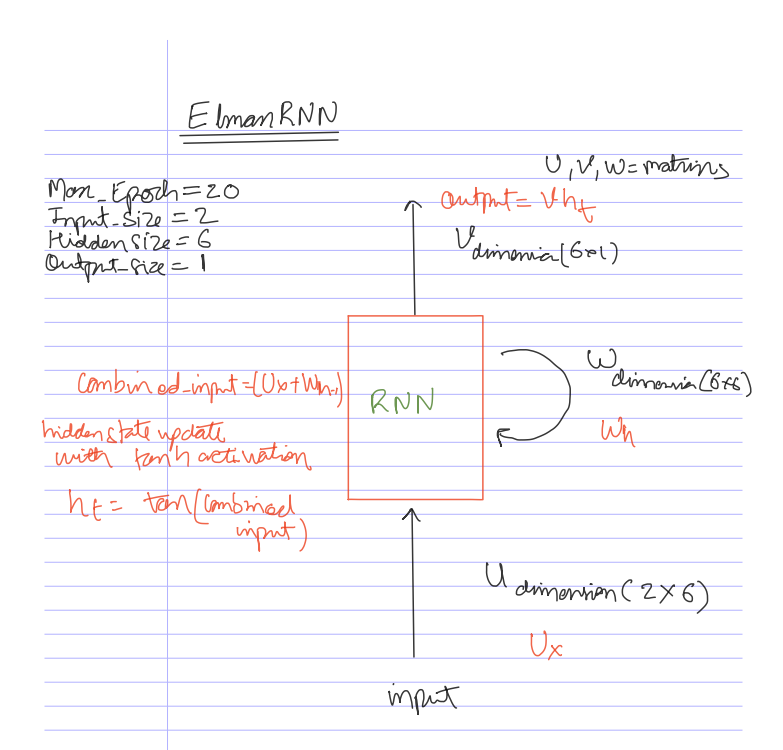

ElmanRNN(
  (U): Linear(in_features=2, out_features=6, bias=False)
  (W): Linear(in_features=6, out_features=6, bias=True)
  (V): Linear(in_features=6, out_features=1, bias=True)
)
Epoch: 1/20, || Loss: 0.14743563332904394
Epoch: 2/20, || Loss: 0.035911466473152825
Epoch: 3/20, || Loss: 0.01816713622399022
Epoch: 4/20, || Loss: 0.013729192590237775
Epoch: 5/20, || Loss: 0.011077645978748236
Epoch: 6/20, || Loss: 0.009203235470578813
Epoch: 7/20, || Loss: 0.0078031396011393655
Epoch: 8/20, || Loss: 0.006691137910414034
Epoch: 9/20, || Loss: 0.0058036929824193265
Epoch: 10/20, || Loss: 0.005059949479437972
Epoch: 11/20, || Loss: 0.0044085646520046285
Epoch: 12/20, || Loss: 0.00383446602359859
Epoch: 13/20, || Loss: 0.00334753399595033
Epoch: 14/20, || Loss: 0.00296644774100489
Epoch: 15/20, || Loss: 0.002685196781347475
Epoch: 16/20, || Loss: 0.0024619002138867264
Epoch: 17/20, || Loss: 0.0022632326030536105
Epoch: 18/20, || Loss: 0.002107244455541806
Epoch: 19/20, || Loss: 0.00199625937

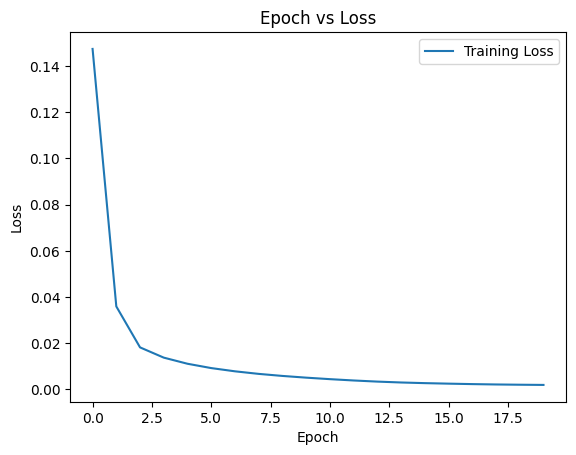

In [10]:
class ElmanRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ElmanRNN, self).__init__()
        # Weight matrix for input to hidden layer
        self.U = Linear_Layer(input_size, hidden_size, bias=False)
        # Weight matrix for hidden to hidden layer
        self.W = Linear_Layer(hidden_size, hidden_size)
        # Weight matrix for hidden to output layer
        self.V = Linear_Layer(hidden_size, output_size)
        # Initialize as double precision
        
        self.double()

    def forward(self, input_data, hidden_state):
        # W_xh * x_t
        Ux = self.U(input_data)
        # W_hh * h_t-1
        Wh = self.W(hidden_state)
        # Combined input for the tanh activation function
        combined_input = Ux + Wh
        # Hidden state update using tanh activation function
        hidden_state_updated = torch.tanh(combined_input)
        # Output from hidden state
        output_result = self.V(hidden_state_updated)
        return output_result, hidden_state_updated

torch.manual_seed(8999)
ModelElmanRNN = ElmanRNN(Input_Size, Hidden_Size, Output_Size)
print(ModelElmanRNN)

# Empty dictionary to save data to plot later
TRAIN_LOSS_HIST = {}

# Defined a loss function as MSE
MSE_LOSS = nn.MSELoss()

# Defined OPTIMIZER as Adam
OPTIMIZER = torch.optim.Adam(ModelElmanRNN.parameters(), lr=L)

epoch = 0  # Initialize epoch counter

while epoch < MAX_EPOCH:
    # Empty Temp list for epoch loss
    EPOCH_LOSS_HIST = []
    # Iter over dataset
    for X_, Y_ in zip(X, Y):
        # Convert X_ and Y_ to double precision
        X_ = torch.tensor(X_, dtype=torch.float64)
        Y_ = torch.tensor(Y_, dtype=torch.float64)

        # Setting gradients to zero
        ModelElmanRNN.zero_grad()

        # Initializing Loss
        loss = 0

        # Initializing parameter to pass in the forward pass
        HID = torch.zeros(1, Hidden_Size, requires_grad=False, dtype=torch.float64)
        OUT = 0

        # Iter over the current Input Sequence
        for i in range(X_.shape[0]):
            OUT, HID = ModelElmanRNN(X_[i, :], HID)

        # Finding loss on the last output
        loss = MSE_LOSS(OUT, Y_)

        # Calling Backward on the final loss
        loss.backward()

        # Clipping the gradient to prevent exploding gradients
        nn.utils.clip_grad_norm_(ModelElmanRNN.parameters(), 3)

        # Updating model parameters
        OPTIMIZER.step()

        # Saving current loss
        EPOCH_LOSS_HIST.append(loss.detach().item())

    # Calculate mean using mathematical formula
    total_loss = sum(EPOCH_LOSS_HIST)
    mean_loss = total_loss / len(EPOCH_LOSS_HIST)

    # Saving average loss over the whole dataset for the epoch
    TRAIN_LOSS_HIST[epoch] = mean_loss

    # Print progress
    print(f"Epoch: {epoch + 1}/{MAX_EPOCH}, || Loss: {mean_loss}")

    # Increment epoch counter
    epoch += 1

# Print final message
print("Training completed.")

# Plotting the training loss over epochs
epochs = list(TRAIN_LOSS_HIST.keys())
losses = list(TRAIN_LOSS_HIST.values())

plt.plot(epochs, losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()
plt.show()

#### Used below equation to implement LSTM

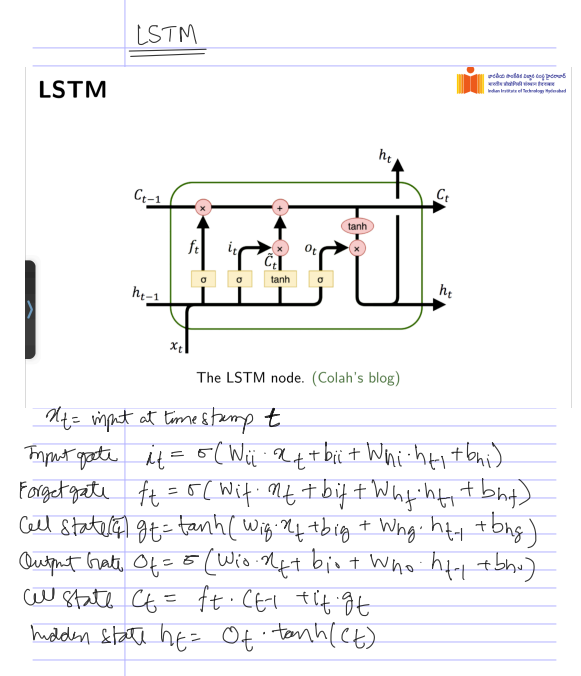

LSTMModel(
  (lstm): LSTMCell(
    (W_ii): Linear(in_features=2, out_features=6, bias=True)
    (W_hi): Linear(in_features=6, out_features=6, bias=True)
    (W_if): Linear(in_features=2, out_features=6, bias=True)
    (W_hf): Linear(in_features=6, out_features=6, bias=True)
    (W_ig): Linear(in_features=2, out_features=6, bias=True)
    (W_hg): Linear(in_features=6, out_features=6, bias=True)
    (W_io): Linear(in_features=2, out_features=6, bias=True)
    (W_ho): Linear(in_features=6, out_features=6, bias=True)
  )
  (fc): Linear(in_features=6, out_features=1, bias=True)
)


Epoch: 1/20, || Loss: 0.08223623233950936
Epoch: 2/20, || Loss: 0.003853394631110916
Epoch: 3/20, || Loss: 0.0019633695925276116
Epoch: 4/20, || Loss: 0.0014146469969730587
Epoch: 5/20, || Loss: 0.001096195181121797
Epoch: 6/20, || Loss: 0.0008941457574267453
Epoch: 7/20, || Loss: 0.0007525321531766382
Epoch: 8/20, || Loss: 0.0006457739455166589
Epoch: 9/20, || Loss: 0.0005625435712929346
Epoch: 10/20, || Loss: 0.0004970669237844245
Epoch: 11/20, || Loss: 0.000445384085829063
Epoch: 12/20, || Loss: 0.0004042080771715286
Epoch: 13/20, || Loss: 0.0003707419341452457
Epoch: 14/20, || Loss: 0.0003427992345593044
Epoch: 15/20, || Loss: 0.0003188753003129793
Epoch: 16/20, || Loss: 0.0002980122496697922
Epoch: 17/20, || Loss: 0.0002795818732976215
Epoch: 18/20, || Loss: 0.0002631160433885751
Epoch: 19/20, || Loss: 0.0002482252810011801
Epoch: 20/20, || Loss: 0.00023458311649979997


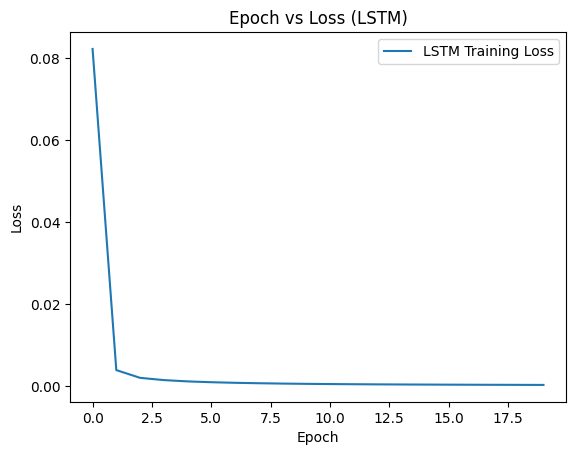

In [11]:
# Define LSTMCell class
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMCell, self).__init__()

        # Input gate parameters
        self.W_ii = Linear_Layer(input_size, hidden_size)
        self.W_hi = Linear_Layer(hidden_size, hidden_size)
        self.b_ii = nn.Parameter(torch.zeros(hidden_size))
        self.b_hi = nn.Parameter(torch.zeros(hidden_size))

        # Forget gate parameters
        self.W_if = Linear_Layer(input_size, hidden_size)
        self.W_hf = Linear_Layer(hidden_size, hidden_size)
        self.b_if = nn.Parameter(torch.zeros(hidden_size))
        self.b_hf = nn.Parameter(torch.zeros(hidden_size))

        # Cell gate parameters
        self.W_ig = Linear_Layer(input_size, hidden_size)
        self.W_hg = Linear_Layer(hidden_size, hidden_size)
        self.b_ig = nn.Parameter(torch.zeros(hidden_size))
        self.b_hg = nn.Parameter(torch.zeros(hidden_size))

        # Output gate parameters
        self.W_io = Linear_Layer(input_size, hidden_size)
        self.W_ho = Linear_Layer(hidden_size, hidden_size)
        self.b_io = nn.Parameter(torch.zeros(hidden_size))
        self.b_ho = nn.Parameter(torch.zeros(hidden_size))

    def forward(self, x, hidden):
        h_t, c_t = hidden

        # Input gate
        i_t = torch.sigmoid(self.W_ii(x) + self.b_ii + self.W_hi(h_t) + self.b_hi)
        # Forget gate
        f_t = torch.sigmoid(self.W_if(x) + self.b_if + self.W_hf(h_t) + self.b_hf)
        # Cell gate
        g_t = torch.tanh(self.W_ig(x) + self.b_ig + self.W_hg(h_t) + self.b_hg)
        # Output gate
        o_t = torch.sigmoid(self.W_io(x) + self.b_io + self.W_ho(h_t) + self.b_ho)
        # Cell state update
        c_t = f_t * c_t + i_t * g_t
        # Hidden state update
        h_t = o_t * torch.tanh(c_t)

        return h_t, c_t

# Define the LSTMModel class
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = LSTMCell(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input_data, hidden):
        h_t, c_t = hidden
        lstm_out = []
        # Iterating over each time step
        for x in input_data.split(1, dim=1):
            x = x.squeeze(1)
            h_t, c_t = self.lstm(x, (h_t, c_t))
            lstm_out.append(h_t.unsqueeze(1))

        lstm_out = torch.cat(lstm_out, dim=1)
        output_result = self.fc(lstm_out[:, -1, :])  # Take the output from the last time step
        return output_result

# Create the LSTM model
ModelLSTM = LSTMModel(Input_Size, Hidden_Size, Output_Size)
ModelLSTM.double()  # Set the model's parameters to double precision
print(ModelLSTM)

# Define optimizer and loss function
OPTIMIZER_LSTM = torch.optim.Adam(ModelLSTM.parameters(), lr=L)
MSE_LOSS_LSTM = nn.MSELoss()

# Training loop
TRAIN_LOSS_HIST_LSTM = {}

for epoch in range(MAX_EPOCH):
    EPOCH_LOSS_HIST = []

    for X_, Y_ in zip(X, Y):
        X_ = torch.tensor(X_, dtype=torch.float64).unsqueeze(0)  # Add batch dimension
        Y_ = torch.tensor(Y_, dtype=torch.float64)

        ModelLSTM.zero_grad()

        # Forward pass
        output = ModelLSTM(X_, (torch.zeros(1, Hidden_Size, dtype=torch.float64), torch.zeros(1, Hidden_Size, dtype=torch.float64)))

        # Calculate loss
        loss = MSE_LOSS_LSTM(output, Y_)

        # Backward pass
        loss.backward()

        # Clip gradients
        nn.utils.clip_grad_norm_(ModelLSTM.parameters(), 3)

        # Update parameters
        OPTIMIZER_LSTM.step()

        # Save current loss
        EPOCH_LOSS_HIST.append(loss.detach().item())

    # Calculate mean loss for the epoch
    total_loss = sum(EPOCH_LOSS_HIST)
    mean_loss = total_loss / len(EPOCH_LOSS_HIST)
    TRAIN_LOSS_HIST_LSTM[epoch] = mean_loss

    # Print progress
    print(f"Epoch: {epoch + 1}/{MAX_EPOCH}, || Loss: {mean_loss}")

# Plotting the training loss over epochs
epochs_lstm = list(TRAIN_LOSS_HIST_LSTM.keys())
losses_lstm = list(TRAIN_LOSS_HIST_LSTM.values())

plt.plot(epochs_lstm, losses_lstm, label='LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss (LSTM)')
plt.legend()
plt.show()

#### Used below equation to implement GRU

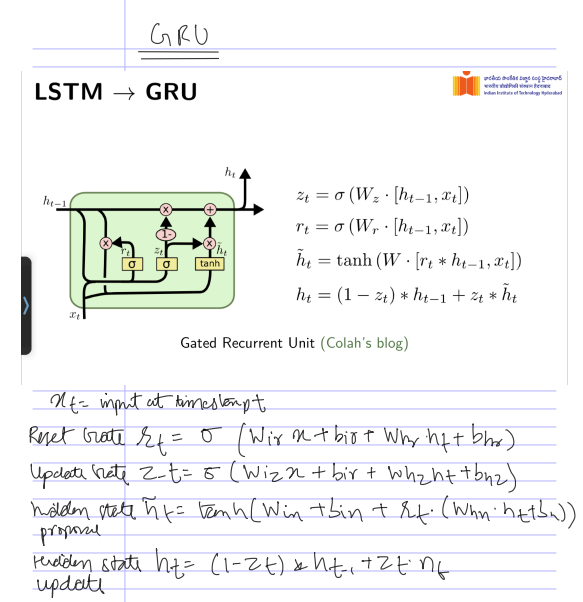

GRUModel(
  (gru): GRUCell(
    (W_ir): Linear(in_features=2, out_features=6, bias=True)
    (W_hr): Linear(in_features=6, out_features=6, bias=True)
    (W_iz): Linear(in_features=2, out_features=6, bias=True)
    (W_hz): Linear(in_features=6, out_features=6, bias=True)
    (W_in): Linear(in_features=2, out_features=6, bias=True)
    (W_hn): Linear(in_features=6, out_features=6, bias=True)
  )
  (fc): Linear(in_features=6, out_features=1, bias=True)
)


Epoch: 1/20, || Loss: 0.0879266427770172
Epoch: 2/20, || Loss: 0.004841612753464521
Epoch: 3/20, || Loss: 0.0018577360327483514
Epoch: 4/20, || Loss: 0.0011097686497999126
Epoch: 5/20, || Loss: 0.0007603061456335793
Epoch: 6/20, || Loss: 0.000553230543735818
Epoch: 7/20, || Loss: 0.0004193023825683129
Epoch: 8/20, || Loss: 0.000331931649727736
Epoch: 9/20, || Loss: 0.0002769567697788592
Epoch: 10/20, || Loss: 0.00023978592253565503
Epoch: 11/20, || Loss: 0.00021199282894851358
Epoch: 12/20, || Loss: 0.00018992604618086267
Epoch: 13/20, || Loss: 0.00017182130639697643
Epoch: 14/20, || Loss: 0.00015670662128907146
Epoch: 15/20, || Loss: 0.0001439137893801806
Epoch: 16/20, || Loss: 0.00013293048177432526
Epoch: 17/20, || Loss: 0.00012336991752003864
Epoch: 18/20, || Loss: 0.00011495422201101273
Epoch: 19/20, || Loss: 0.00010749200980290403
Epoch: 20/20, || Loss: 0.00010085455628048615


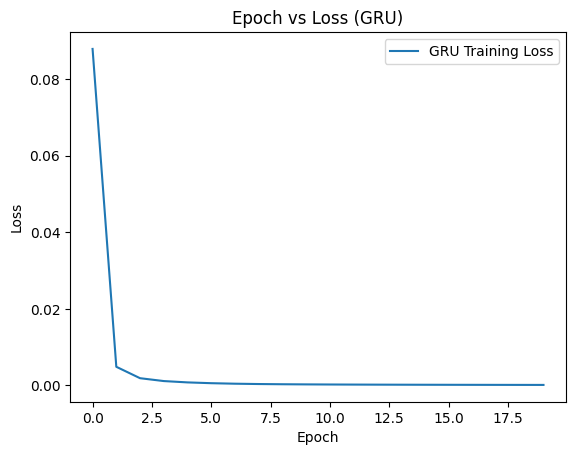

In [12]:
# Define GRUCell class
class GRUCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(GRUCell, self).__init__()

        # Reset gate parameters
        self.W_ir = Linear_Layer(input_size, hidden_size)
        self.W_hr = Linear_Layer(hidden_size, hidden_size)
        self.b_ir = nn.Parameter(torch.zeros(hidden_size))
        self.b_hr = nn.Parameter(torch.zeros(hidden_size))

        # Update gate parameters
        self.W_iz = Linear_Layer(input_size, hidden_size)
        self.W_hz = Linear_Layer(hidden_size, hidden_size)
        self.b_iz = nn.Parameter(torch.zeros(hidden_size))
        self.b_hz = nn.Parameter(torch.zeros(hidden_size))

        # Hidden state proposal
        self.W_in = Linear_Layer(input_size, hidden_size)
        self.W_hn = Linear_Layer(hidden_size, hidden_size)
        self.b_in = nn.Parameter(torch.zeros(hidden_size))
        self.b_hn = nn.Parameter(torch.zeros(hidden_size))

    def forward(self, x, hidden):
        h_t = hidden

        # Reset gate
        r_t = torch.sigmoid(self.W_ir(x) + self.b_ir + self.W_hr(h_t) + self.b_hr)

        # Update gate
        z_t = torch.sigmoid(self.W_iz(x) + self.b_iz + self.W_hz(h_t) + self.b_hz)

        # Hidden state proposal
        n_t = torch.tanh(self.W_in(x) + self.b_in + r_t * (self.W_hn(h_t) + self.b_hn))

        # Hidden state update
        h_t = (1 - z_t) * h_t + z_t * n_t
        return h_t

# Define the GRUModel class
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = GRUCell(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input_data, hidden):
        gru_out = []

        # Iterating over each time step
        for x in input_data.split(1, dim=1):
            x = x.squeeze(1)
            hidden = self.gru(x, hidden)
            gru_out.append(hidden.unsqueeze(1))

        gru_out = torch.cat(gru_out, dim=1)
        output_result = self.fc(gru_out[:, -1, :])  # Take the output from the last time step
        return output_result

# Create the GRU model
ModelGRU = GRUModel(Input_Size, Hidden_Size, Output_Size)
ModelGRU.double()  # Set the model's parameters to double precision
print(ModelGRU)

# Define optimizer and loss function
OPTIMIZER_GRU = torch.optim.Adam(ModelGRU.parameters(), lr=L)
MSE_LOSS_GRU = nn.MSELoss()

# Training loop
TRAIN_LOSS_HIST_GRU = {}

for epoch in range(MAX_EPOCH):
    EPOCH_LOSS_HIST = []

    for X_, Y_ in zip(X, Y):
        X_ = torch.tensor(X_, dtype=torch.float64).unsqueeze(0)  # Add batch dimension
        Y_ = torch.tensor(Y_, dtype=torch.float64)

        ModelGRU.zero_grad()

        # Forward pass
        output = ModelGRU(X_, torch.zeros(1, Hidden_Size, dtype=torch.float64))

        # Calculate loss
        loss = MSE_LOSS_GRU(output, Y_)

        # Backward pass
        loss.backward()

        # Clip gradients
        nn.utils.clip_grad_norm_(ModelGRU.parameters(), 3)

        # Update parameters
        OPTIMIZER_GRU.step()

        # Save current loss
        EPOCH_LOSS_HIST.append(loss.detach().item())

    # Calculate mean loss for the epoch
    total_loss = sum(EPOCH_LOSS_HIST)
    mean_loss = total_loss / len(EPOCH_LOSS_HIST)
    TRAIN_LOSS_HIST_GRU[epoch] = mean_loss

    # Print progress
    print(f"Epoch: {epoch + 1}/{MAX_EPOCH}, || Loss: {mean_loss}")

# Plotting the training loss over epochs
epochs_gru = list(TRAIN_LOSS_HIST_GRU.keys())
losses_gru = list(TRAIN_LOSS_HIST_GRU.values())

plt.plot(epochs_gru, losses_gru, label='GRU Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss (GRU)')
plt.legend()
plt.show()

In [13]:
# Calculating Baseline
BASELINE_LOSS_HISTORY = {}
for epoch in range(MAX_EPOCH):
    EPOCH_BASELINE_LOSS_HISTORY = []
    for X_sample, Y_target in zip(X, Y):
        baseline_loss = MSE_LOSS(torch.tensor(1), Y_target)
        EPOCH_BASELINE_LOSS_HISTORY.append(baseline_loss.detach().item())

    BASELINE_LOSS_HISTORY[epoch] = torch.tensor(EPOCH_BASELINE_LOSS_HISTORY).mean()

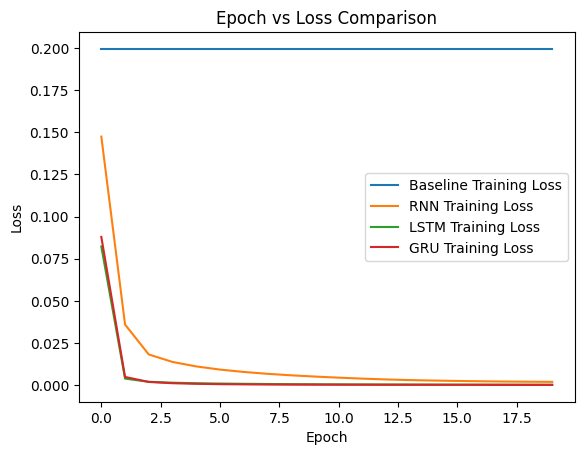

In [14]:
# Plotting the training loss over epochs for RNN, LSTM, and GRU
epochs_base = list(BASELINE_LOSS_HISTORY.keys())
losses_base = list(BASELINE_LOSS_HISTORY.values())

epochs_rnn = list(TRAIN_LOSS_HIST.keys())
losses_rnn = list(TRAIN_LOSS_HIST.values())

epochs_lstm = list(TRAIN_LOSS_HIST_LSTM.keys())
losses_lstm = list(TRAIN_LOSS_HIST_LSTM.values())

epochs_gru = list(TRAIN_LOSS_HIST_GRU.keys())
losses_gru = list(TRAIN_LOSS_HIST_GRU.values())

plt.plot(epochs_base, losses_base, label='Baseline Training Loss')
plt.plot(epochs_rnn, losses_rnn, label='RNN Training Loss')
plt.plot(epochs_lstm, losses_lstm, label='LSTM Training Loss')
plt.plot(epochs_gru, losses_gru, label='GRU Training Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss Comparison')

plt.legend()
plt.show()